# Analyzing Time-Series Data

## 1. Preparing Notebook

In [1]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm 
import os
import warnings 

warnings.filterwarnings("ignore") 
plt.style.use('fivethirtyeight') 

In [2]:
# Configure API key 

quandl.ApiConfig.api_key = 'hNdM3m_zdsBf4Lt2DdBk'

In [3]:
# Importing the IMF Cross Country Macroeconomics Statistics variable for GDP

data = quandl.get('ODA/USA_NGDPRPPPPC')

In [4]:
# Checking Data

data.head(10)

,Value
Date,
1980-12-31,29135.98
1981-12-31,29577.30
1982-12-31,28767.38
1983-12-31,29813.85
1984-12-31,31692.73
1985-12-31,32722.01
1986-12-31,33548.73
1987-12-31,34400.81
1988-12-31,35513.42


In [5]:
data.shape

(45, 1)

In [6]:
data.columns

Index(['Value'], dtype='object')

### There should be no need to subset this data, as the time frame I'm looking at serves the purpose of this analysis just fine as is

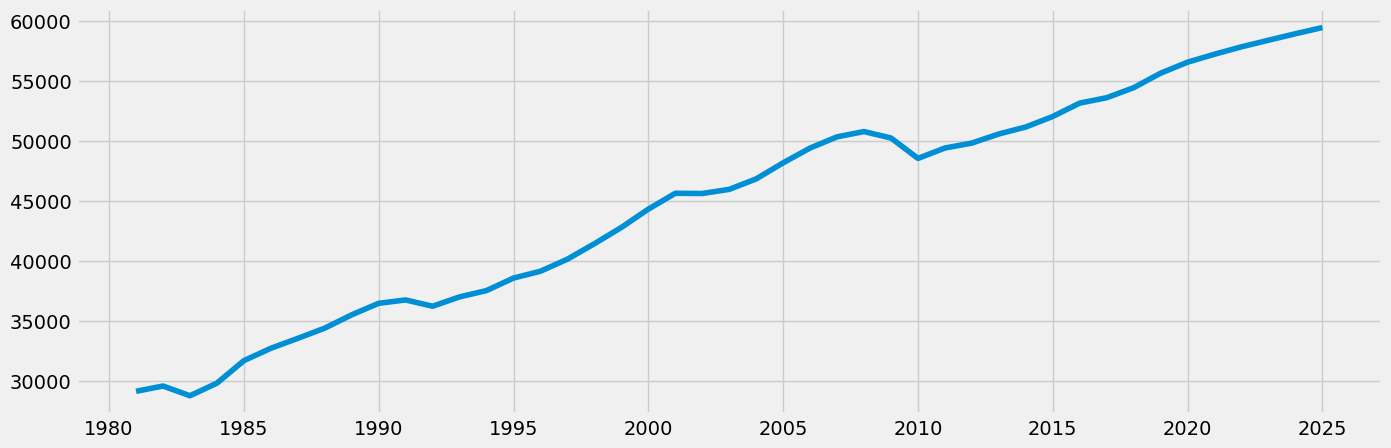

In [7]:
# Plot the data using matplotlib.

plt.figure(figsize=(15,5), dpi=100) 
plt.plot(data)

In [8]:
# Checking for missing values

data.isnull().sum()

Value    0
dtype: int64

In [9]:
# Checking for dups

dups = data.duplicated()
dups.sum()

0

## 2. Decomposing the Data

In [10]:
# Decompose the time series using an additive model

decomposition = sm.tsa.seasonal_decompose(data, model='additive')

In [11]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

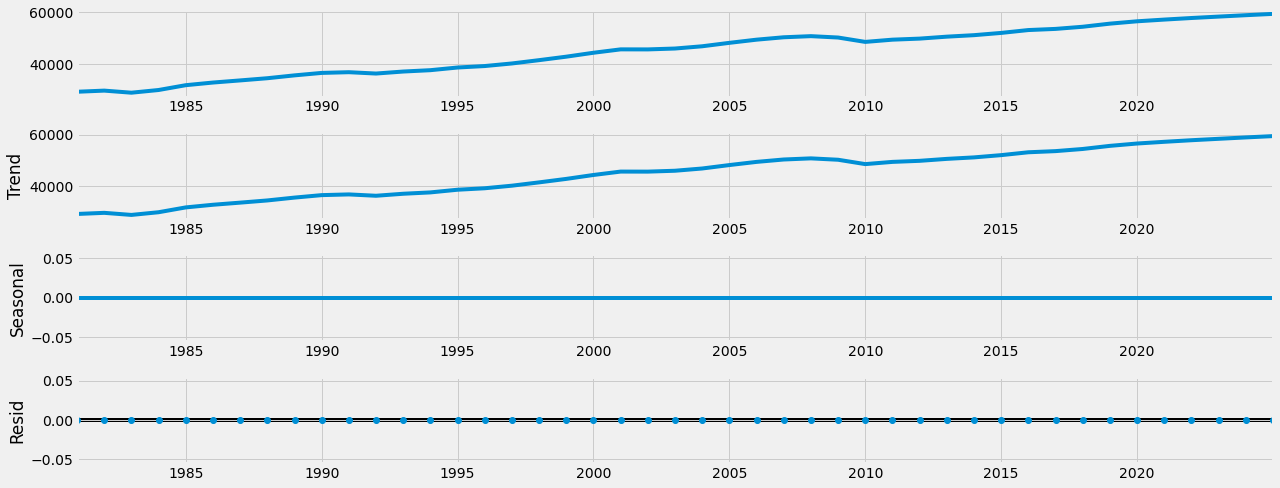

In [12]:
# Plotting the decomposed parts of the data

decomposition.plot()
plt.show()

#### Because the data needed no smoothing, the level is the same as the trend. If there had been more instances of unexplained "noise" in the data, those two would have been different.

#### The seasonal graph is a bit unusual, as there seems to be no seasonality to the data whatsoever. However, if you think about it, the GDP of a country ideally wouldn't fluctuate based on the season of the year. 

#### Lastly, the residual graph shows that there is zero unexplained noise in our data.

## 3. Testing for Stationarity

In [13]:
from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(data['Value'])

Dickey-Fuller Stationarity test:
Test Statistic                 -0.748195
p-value                         0.833868
Number of Lags Used             1.000000
Number of Observations Used    43.000000
Critical Value (1%)            -3.592504
Critical Value (5%)            -2.931550
Critical Value (10%)           -2.604066
dtype: float64


#### Because our test statistic is larger than our critical values, we cannot reject the null hypothesis that our data contains a unit root, meaning that our data is non-stationary. 

## 4. Stationarizing the Data

In [14]:
# Stationarizing using the differencing method

data_diff = data - data.shift(1)

In [15]:
data_diff.dropna(inplace = True) # Here, you remove the missing values that came about as a result of the differencing. 
# You need to remove these or you won't be able to run the Dickey-Fuller test.

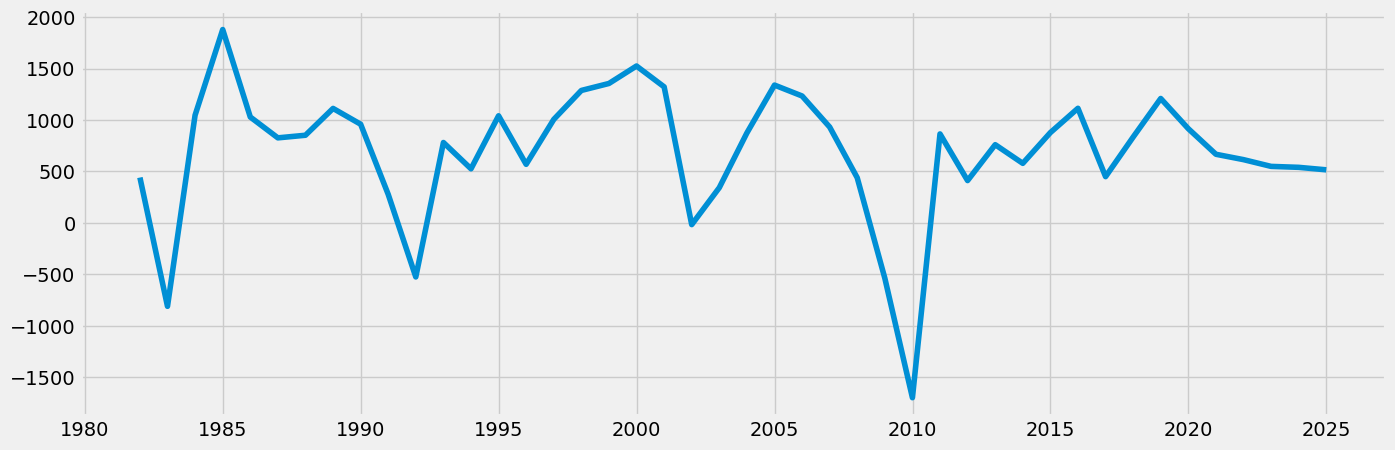

In [16]:
# Checking how the differencing affected our data

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [17]:
dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                 -4.518311
p-value                         0.000182
Number of Lags Used             0.000000
Number of Observations Used    43.000000
Critical Value (1%)            -3.592504
Critical Value (5%)            -2.931550
Critical Value (10%)           -2.604066
dtype: float64


#### The differencing has succeeded in stationarizing the data. The test statistic is now smaller than the critical values, meaning we can now reject the null hypothesis. The p-value is also now under 0.05, meaning that our test is significant. 